# Analyzing and Visualizing 

In [2]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
tweet = pd.read_csv('twitter_archive_clean.csv')
pred = pd.read_csv('predictions_clean.csv')

In [4]:
tweet.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,35936.0,7632.0,8796097.0,145904.0,2017-08-01 16:23:56+00:00
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,31008.0,5642.0,8796097.0,145904.0,2017-08-01 00:17:27+00:00
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,23329.0,3740.0,8796097.0,145904.0,2017-07-31 00:18:03+00:00
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,39230.0,7804.0,8795415.0,145902.0,2017-07-30 15:58:51+00:00
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,37450.0,8397.0,8796097.0,145904.0,2017-07-29 16:00:24+00:00


In [5]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 14 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null float64
name                  1367 non-null object
dog_type              322 non-null object
favorites             1964 non-null float64
retweets              1964 non-null float64
user_followers        1964 non-null float64
user_favourites       1964 non-null float64
date_time             1964 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 161.7+ KB


In [6]:
pred.head()

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [7]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5913 entries, 0 to 5912
Data columns (total 7 columns):
tweet_id            5913 non-null int64
jpg_url             5913 non-null object
img_num             5913 non-null int64
prediction_order    5913 non-null int64
prediction          5913 non-null object
confidence          5913 non-null float64
dog                 5913 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 236.8+ KB


In [16]:
# Change types
tweet.tweet_id = tweet.tweet_id.astype(str)
pred.tweet_id = pred.tweet_id.astype(str)
tweet.dog_type = tweet.dog_type.astype("category")
pred.prediction_order = pred.prediction_order.astype("category")
tweet.timestamp = pd.to_datetime(tweet.timestamp)

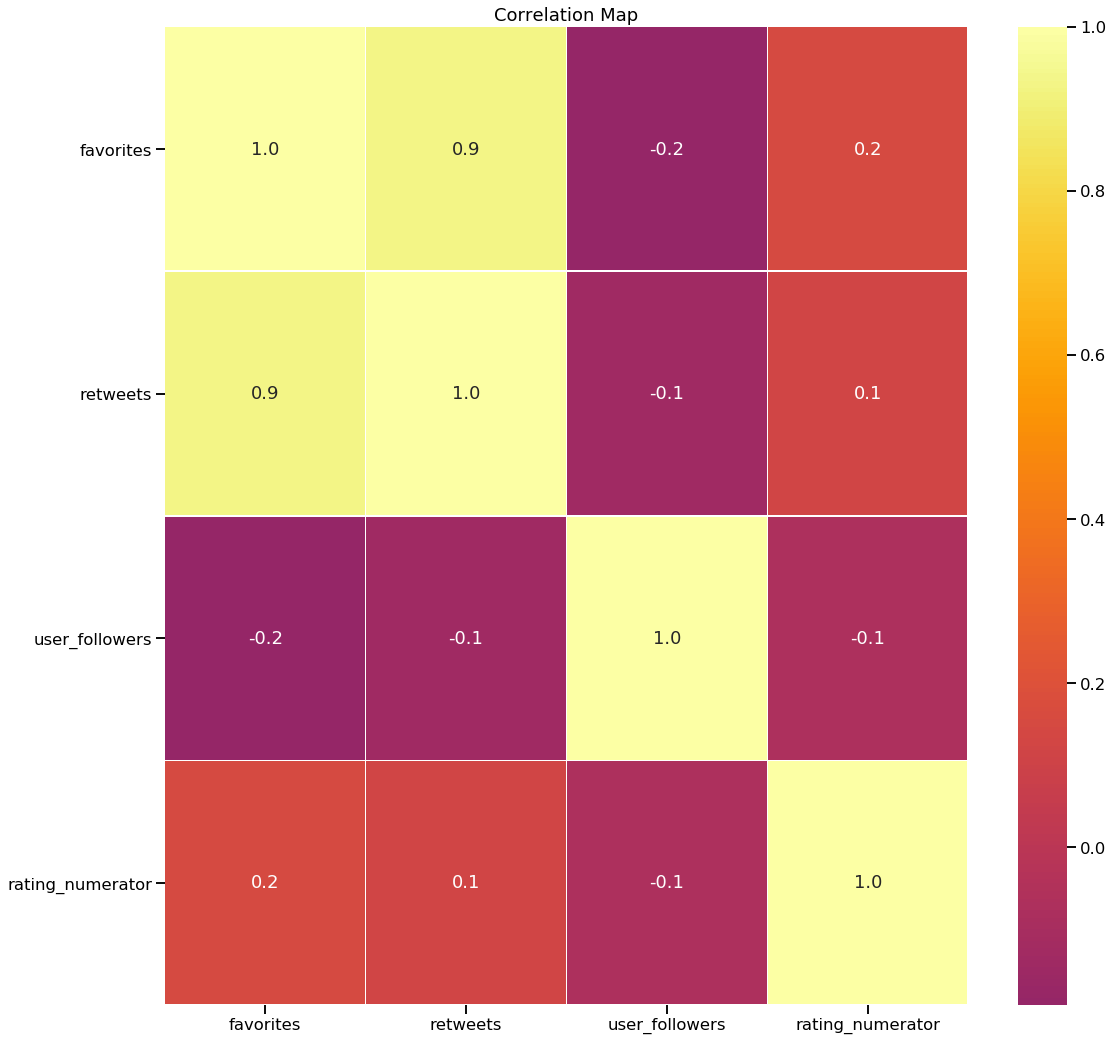

In [17]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(tweet[['source', 'favorites','retweets',
                'user_followers','rating_numerator']].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap = 'inferno', center = 0)
#I could not see the complete matrix over here, hence got help via github
# Link- https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
bottom, top = plt.ylim() 
bottom += 0.5 
top -= 0.5
plt.ylim(bottom, top)
plt.yticks(rotation=0);
plt.title('Correlation Map');
plt.show()

**Insights**
- The only strong correlation we see here is between favorites and retweet, this is normal (more favorites mean more retweets)
- User followers and retweet have a weak negative correlation of -0.4 (this seems the opposite of normal prediction)
- Rating don't get affected with any other variable from the ones we ploted

## Changes over time

### Retweets

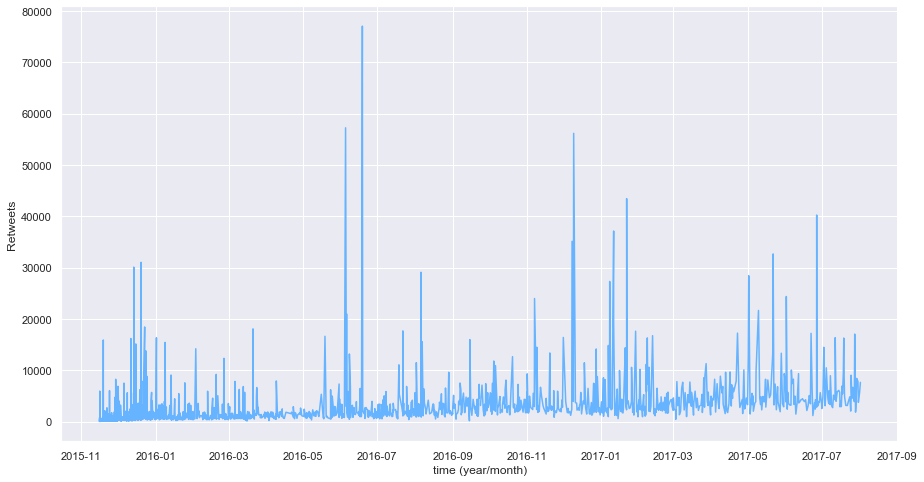

In [27]:
def set_my_palette():
    sns.set()
    current_palette = sns.color_palette(my_palette)
    sns.set_palette(current_palette)

my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
set_my_palette()
sns.set_context()
plt.subplots(figsize=(15, 8))
plt.ylabel("Retweets")
plt.xlabel("time (year/month)")
plt.plot(tweet.timestamp, tweet.retweets);


In [28]:
weekly_retweets = tweet.groupby(pd.Grouper(key='timestamp', freq='1w'))['retweets'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]

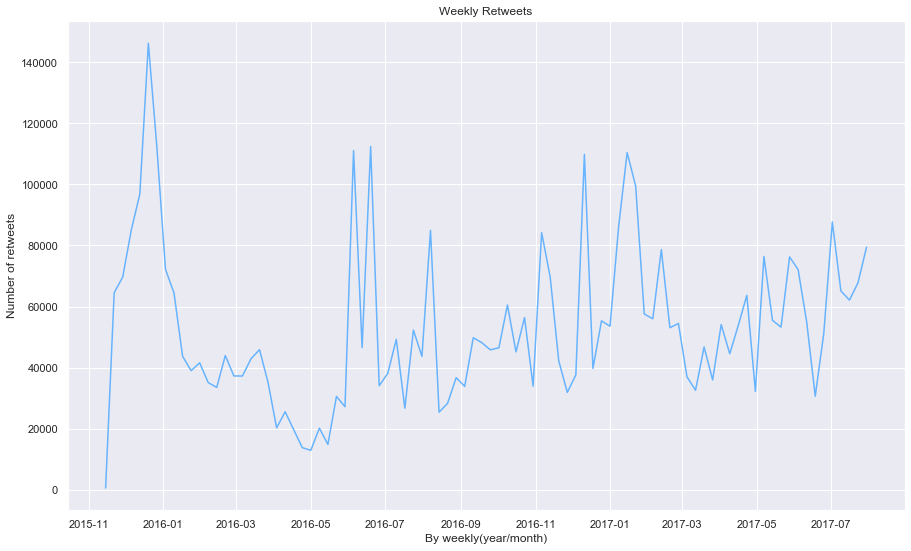

In [32]:
plt.subplots(figsize=(15, 9))
plt.ylabel("Number of retweets")
plt.xlabel("By weekly(year/month)")
plt.title("Weekly Retweets")
plt.plot(weekly_retweets.timestamp, weekly_retweets.retweets);

### Favorites

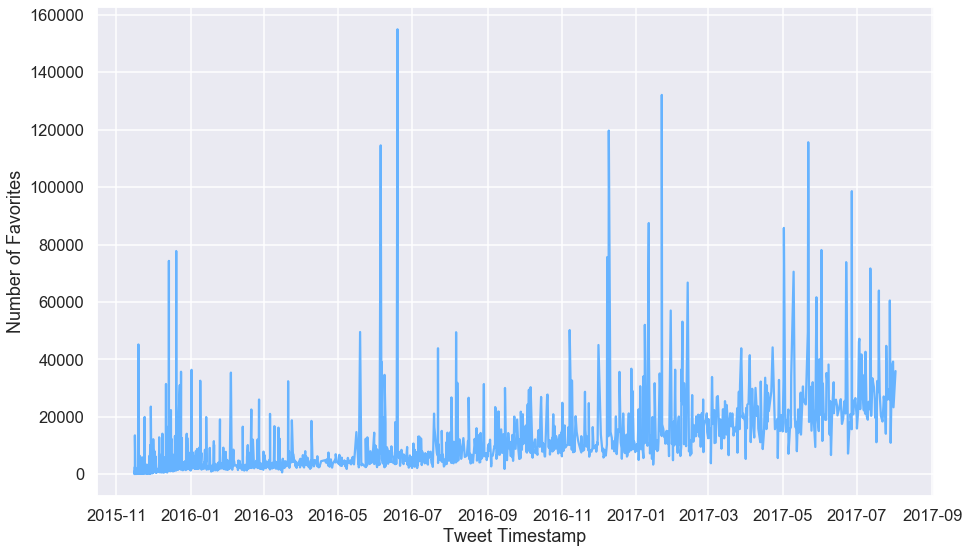

In [48]:
plt.subplots(figsize=(15, 9))
plt.xlabel("Tweet Timestamp")
plt.ylabel("Number of Favorites")
plt.plot(tweet.timestamp, tweet.favorites);

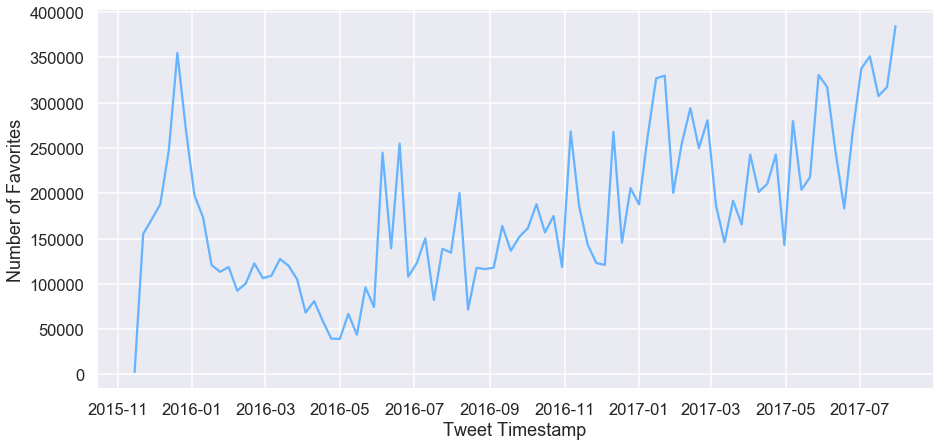

In [53]:
weekly_favorites = tweet.groupby(pd.Grouper(key='timestamp', freq='1w'))['favorites'].sum()\
                    .reset_index().sort_values('timestamp')[:-1]
plt.subplots(figsize=(15, 7))
plt.xlabel("Tweet Timestamp")
plt.ylabel("Number of Favorites")
plt.plot(weekly_favorites.timestamp, weekly_favorites.favorites);

## Retweets vs. Favorites

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


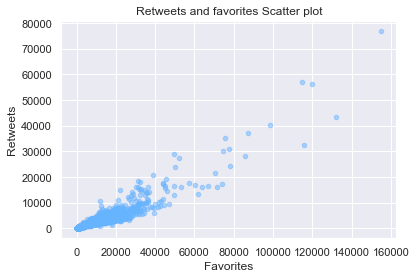

In [35]:
tweet.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5);
plt.xlabel('Favorites');
plt.ylabel('Retweets');
plt.title('Retweets and favorites Scatter plot');

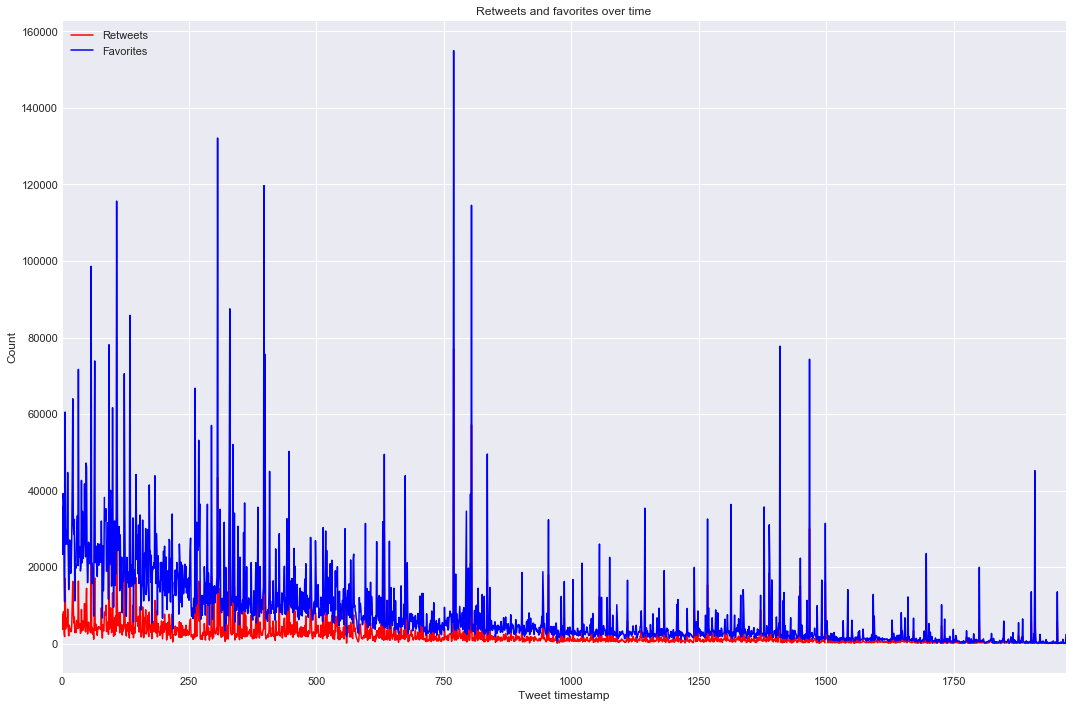

In [42]:
plt.subplots(figsize=(18,12))
tweet['retweets'].plot(color = 'red', label='Retweets')
tweet['favorites'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('Tweet timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.savefig('retweets_favorites.png')
plt.show();

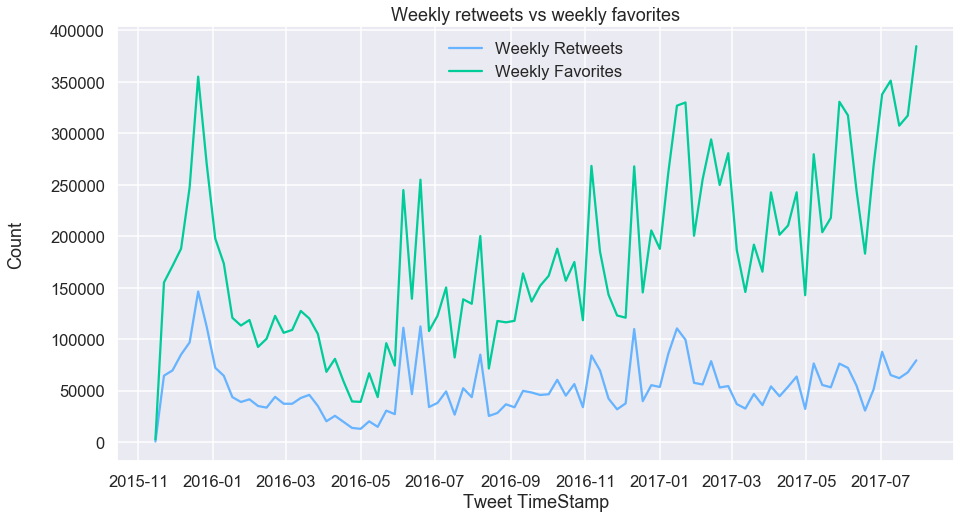

In [57]:
plt.subplots(figsize=(15, 8))
plt.plot(weekly_retweets.timestamp, weekly_retweets.retweets, label="Weekly Retweets")
plt.plot(weekly_favorites.timestamp, weekly_favorites.favorites, label="Weekly Favorites")
plt.title('Weekly retweets vs weekly favorites')
plt.xlabel('Tweet TimeStamp')
plt.ylabel('Count\n')
plt.legend();
plt.savefig('love-increases.png')


## Dog type

In [58]:
dog_count = tweet.groupby('dog_type')['tweet_id'].count()
dog_count

dog_type
doggo       66
floofer      3
pupper     225
puppo       28
Name: tweet_id, dtype: int64

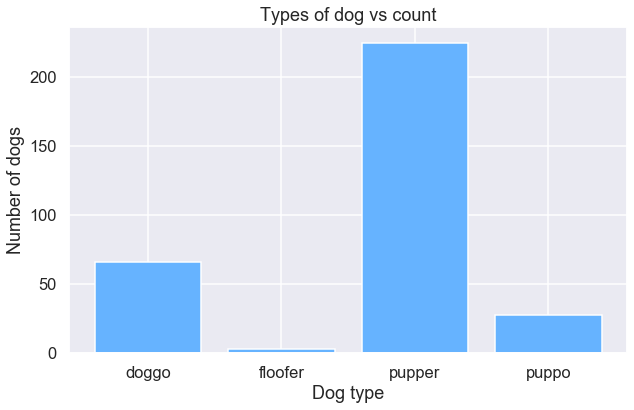

In [61]:
plt.subplots(figsize=(10, 6))
plt.bar([1, 2, 3, 4], dog_count, tick_label=['doggo', 'floofer', 'pupper', 'puppo'])
plt.title('Types of dog vs count')
plt.xlabel('Dog type')
plt.ylabel('Number of dogs');

**Insight** Seems like pupper's are very famous among the humans, and floofer's aren't. 
Why? Just [look](https://www.google.com/search?sxsrf=ALeKk02idgicJAA-eGlSjKgtmzYjpkrvvQ:1595042333942&source=univ&tbm=isch&q=floofer+dog&safe=active&sa=X&ved=2ahUKEwj6l93d69XqAhUzKX0KHbHLBU4QjJkEegQIARAB&biw=1364&bih=697) at them

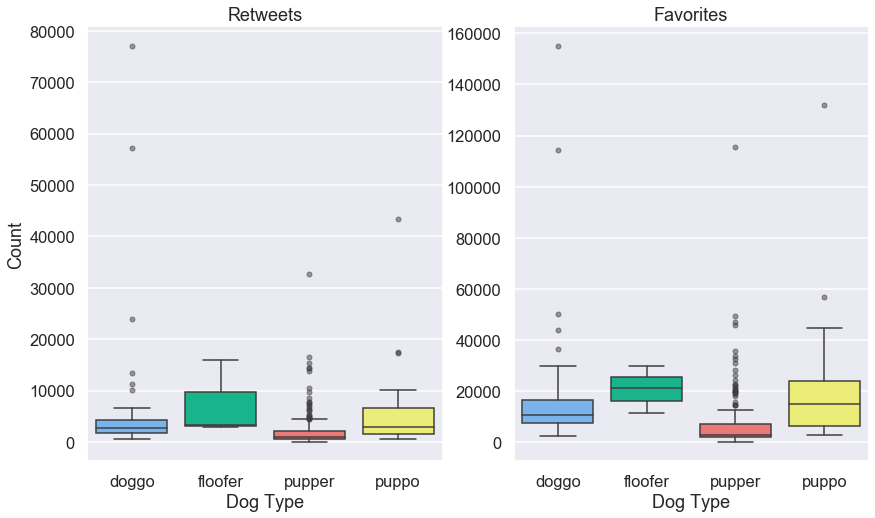

In [64]:
# Set outlier style
flierprops = dict(marker='o', alpha=0.5, markeredgewidth=1)

plt.subplots(figsize=(14, 8))
plt.subplot(1,2,1)
sns.boxplot(x=tweet.dog_type, y=tweet.retweets, flierprops=flierprops, linewidth=1.5)
plt.title('Retweets')
plt.xlabel('Dog Type')
plt.ylabel('Count');

plt.subplot(1,2,2)
sns.boxplot(x=tweet.dog_type, y=tweet.favorites, flierprops=flierprops, linewidth=1.5)
plt.title('Favorites')
plt.xlabel('Dog Type')
plt.ylabel('');

## Highest Rated

#### Retweet

In [68]:
# Get index
ind = tweet.retweets.nlargest(5).index
# Get details
high_retweets = tweet[['tweet_id', 'text', 'name', 'retweets', 'favorites', 'rating_numerator', 'rating_denominator', 'dog_type']].iloc[ind]
high_retweets

,tweet_id,text,name,retweets,favorites,rating_numerator,rating_denominator,dog_type
769,744234799360020481,Here's a doggo realizing you can stand in a po...,NaN,77034.0,154981.0,13.0,10.0,doggo
804,739238157791694849,Here's a doggo blowing bubbles. It's downright...,NaN,57226.0,114552.0,13.0,10.0,doggo
397,807106840509214720,This is Stephan. He just wants to help. 13/10 ...,Stephan,56147.0,119693.0,13.0,10.0,NaN
306,822872901745569793,Here's a super supportive puppo participating ...,NaN,43426.0,132126.0,13.0,10.0,puppo
58,879415818425184262,This is Duddles. He did an attempt. 13/10 some...,Duddles,40232.0,98598.0,13.0,10.0,NaN


Hence here are top retweets, 2 with names and 3 without names. All have rating of 13.0/10.0

In [69]:
high_retweets.describe()

,retweets,favorites,rating_numerator,rating_denominator
count,5.000000,5.000000,5.0,5.0
mean,54813.000000,123990.000000,13.0,10.0
std,14522.777765,21088.683541,0.0,0.0
min,40232.000000,98598.000000,13.0,10.0
25%,43426.000000,114552.000000,13.0,10.0
50%,56147.000000,119693.000000,13.0,10.0
75%,57226.000000,132126.000000,13.0,10.0
max,77034.000000,154981.000000,13.0,10.0


In [71]:
# Getting image urls for prediction
image = pred[pred.tweet_id == '744234799360020481']['jpg_url']
duplicates = image.duplicated()
image = image[~duplicates]
image.values[0]

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [72]:
url_list = []
for tweet_id in high_retweets.tweet_id:
    image = pred[pred.tweet_id == tweet_id]['jpg_url']
    duplicates = image.duplicated()
    image = image[~duplicates]
    image_url = image.values[0]
    url_list.append(image_url)
    
url_list

['https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg',
 'https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg',
 'https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg']

In [78]:
from IPython.display import Image
Image(url= url_list[0], width=150, height=150)

In [79]:
print(high_retweets.text.loc[ind[0]])

Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad)


In [82]:
Image(url= url_list[1], width=200, height=350)

In [83]:
print(high_retweets.text.loc[ind[1]])

Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee)


In [84]:
Image(url= url_list[2], width=200, height=350)

In [85]:
print(high_retweets.text.loc[ind[2]])

This is Stephan. He just wants to help. 13/10 such a good boy


In [96]:
Image(url= url_list[3], width=800, height=350)

In [87]:
print(high_retweets.text.loc[ind[3]])

Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10


In [88]:
Image(url= url_list[4], width=300, height=350)

In [90]:
print(high_retweets.text.loc[ind[4]])

This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici)


**3 out of 5 tweets(with highest number of retweets) are videos, people like dog vidoes. I mean who doesn't :)**

## Prediction

## How confident are we?

In [97]:
confident = pred.groupby('prediction_order')['confidence']

In [98]:
confident.mean()

prediction_order
1    0.594558
2    0.134585
3    0.060166
Name: confidence, dtype: float64

In [99]:
confident.median()

prediction_order
1    0.587764
2    0.117397
3    0.049444
Name: confidence, dtype: float64

In [100]:
confident.std()

prediction_order
1    0.272126
2    0.101053
3    0.050942
Name: confidence, dtype: float64

In [101]:
confident.mean() - confident.std()

prediction_order
1    0.322431
2    0.033532
3    0.009224
Name: confidence, dtype: float64

In [102]:
confident.mean() + confident.std()

prediction_order
1    0.866684
2    0.235638
3    0.111107
Name: confidence, dtype: float64

C:\Users\ezone\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


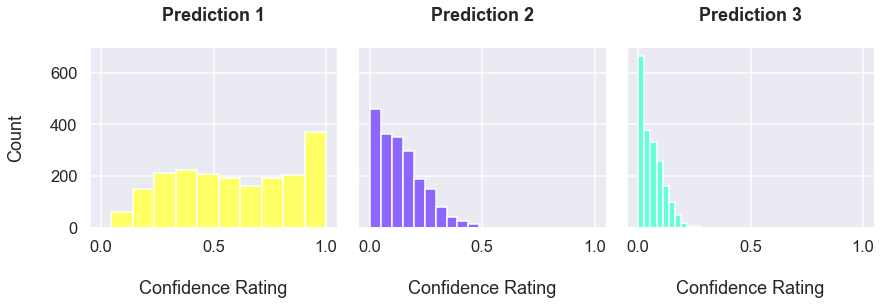

In [103]:
sns.FacetGrid(pred, col="prediction_order", hue="prediction_order", palette=my_palette[3:], size=4)\
    .map(plt.hist, "confidence")\
    .set_titles("Prediction {col_name}\n", weight='bold', fontsize=14)\
    .set_axis_labels("\nConfidence Rating", "Count\n");


**At first glance this doesn't looks promising, sometimes on their best guess the machine was only 10% confident taht it knew that it was a dog. But there are a lot of guesses that were close in the 90% range. So let's see whats going on**

#### Sample

In [141]:
sample = pred.query('prediction_order == 1').sample(5)
sample

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
1785,679862121895714818,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,1,1,EntleBucher,0.523206,True
3579,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,1,kuvasz,0.350629,True
3597,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,1,dalmatian,0.562315,True
420,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,1,bustard,0.380772,False
1821,680206703334408192,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,1,1,Christmas_stocking,0.149758,False


## First

In [142]:
Image(url=sample.jpg_url.iloc[0], width=300, height=300)


In [143]:
pred[pred.tweet_id == sample.tweet_id.iloc[0]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
1785,679862121895714818,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,1,1,EntleBucher,0.523206,True
1786,679862121895714818,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,1,2,Greater_Swiss_Mountain_dog,0.431657,True
1787,679862121895714818,https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg,1,3,Appenzeller,0.044208,True


**Woah! That is a right answer**

### Second

In [144]:
Image(url=sample.jpg_url.iloc[1], width=300, height=300)

In [145]:
pred[pred.tweet_id == sample.tweet_id.iloc[1]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
3579,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,1,kuvasz,0.350629,True
3580,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,2,soft-coated_wheaten_terrier,0.182782,True
3581,743222593470234624,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,1,3,golden_retriever,0.087662,True


**Bang On Again!**

### Third

In [146]:
Image(url=sample.jpg_url.iloc[2], width=300, height=300)

In [147]:
pred[pred.tweet_id == sample.tweet_id.iloc[2]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
3597,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,1,dalmatian,0.562315,True
3598,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,2,Great_Dane,0.416478,True
3599,743895849529389061,https://pbs.twimg.com/media/ClLZU8LWQAAsOxV.jpg,1,3,German_short-haired_pointer,0.008552,True


**Two in one. but it still picked it correctly**

### Fourth

In [148]:
Image(url=sample.jpg_url.iloc[3], width=300, height=300)

In [149]:
pred[pred.tweet_id == sample.tweet_id.iloc[3]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
420,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,1,bustard,0.380772,False
421,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,2,pelican,0.100554,False
422,668614819948453888,https://pbs.twimg.com/media/CUdloW8WEAAxB_Y.jpg,1,3,crane,0.084713,False


**That's a beautiful picture, but unfortunately that's not a dog. And it did guess is correctly**

### Fifth

In [150]:
Image(url=sample.jpg_url.iloc[4], width=300, height=300)

In [151]:
pred[pred.tweet_id == sample.tweet_id.iloc[4]]

,tweet_id,jpg_url,img_num,prediction_order,prediction,confidence,dog
1821,680206703334408192,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,1,1,Christmas_stocking,0.149758,False
1822,680206703334408192,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,1,2,cloak,0.128830,False
1823,680206703334408192,https://pbs.twimg.com/media/CXCUYcRW8AAObYM.jpg,1,3,teddy,0.109129,False


**That's so cute. And I think that is a dog dressed in a christmas costume. But unfortunaley the results are wrong**

# Conclusion

1. The Twitter account WeRateDogs (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "15/10". It has acquired over 8.7 million followers.

**If you are thinking of adopting a dog, why think? Go get one. They are adorable!**